# План занятия:

Пространственная обработка изображений:
* фильтры/свертка
* Blur
* Gaussian Blur
* Median Blur
* Sobel and Laplasian


Попиксельные преобразования изображения:
* работа с яркостью и контрастом 
* гамма коррекция

Бинаризация и трешолдинг
* Simple Thresholding
* Adaptive Thresholding

Морфологические операции
* Erosion
* Dilation
* Opening
* Closing

In [218]:
!pip install opencv-contrib-python matplotlib numpy

In [3]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML
from matplotlib import pyplot as plt

# Пространственная обработка изображений. 

Для начала нам необходимо ввести понятие корреляция и свертки.





### Корреляция в 1D

![corr](./imgs/corr_0.png)

![corr](./imgs/corr_1.png)

### Padding

![corr2d](./imgs/corr_2.png)

### Корреляция (correlation) в 2D

![corr2d](./imgs/corr_3.png)

### Свертка (convolution) в 2D

![conv](./imgs/conv_0.png)


![image](https://miro.medium.com/max/354/1*1okwhewf5KCtIPaFib4XaA.gif)

### Задание:
* Реализовать 1D корреляцию для произвольного изображения и фильтра.
* Реализовать 2D корреляцию для произвольного изображения и фильтра.
* Реализовать 2D свертку для произвольного изображения и фильтра.

## Blur
Попробуем понять, какую пользу могут нести свертки.
Начнем с самого простого, что только можно придумать. 

In [293]:
!mkdir -p input_files & wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" -q -O ./input_files/lenna.png

In [ ]:
img = cv2.imread('./input_files/lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(gray, cmap='gray')

Зададим простой фильтр, состоящий из всех 1. А для того, чтобы при суммировании не произошло переполнения, добавим нормировочный коэффициент. 


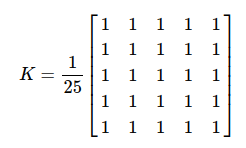

In [ ]:
kernel = np.ones((5, 5), dtype=np.float)
print(kernel)

kernel /= np.sum(kernel)
print(kernel)

Для того, чтобы применить фильтр к изображению в OpenCV есть несколько методов. Для применения произвольного фильтра существует функция [cv2.filter2D()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)

In [ ]:
blurred = cv2.filter2D(gray, -1, kernel)

figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for img, subplot in zip([gray, blurred], plots):
    subplot.imshow(img, cmap='gray')
    subplot.set_axis_off()
plt.show()

То же самое мы можем сделать и при помощи других функций. Например, [cv2.boxFilter()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3). Отличие состоит в том, что мы туда уже не передаем сами ядро. Оно создается автоматически. На самом деле аналогичную операцию выполняет и функция [cv2.blur()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

In [ ]:
img = cv2.imread('./input_files/lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.blur(gray, (5, 5))

figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for img, subplot in zip([gray, blurred], plots):
    subplot.imshow(img, cmap='gray')
    subplot.set_axis_off()
plt.show()

### Как размер ядра будет влиять на степень размытия?

Чем большего будет размера ядро, тем сильнее будет размытие:

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(w, h):
    blurred = cv2.blur(image, (w, h))

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, blurred], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()
    plt.show()


w = widgets.IntSlider(min=1, max=55, value=1, step=2, description='w:')
h = widgets.IntSlider(min=1, max=55, value=1, step=2, description='h:')


    
widgets.interactive(update_plot, w=w, h=h)

## Gaussian Blur

Делает примерно то же самое, но использует вместо однородного ядра гауссово ядро. Для того, чтобы посмотреть, как оно выглядит можно воспользоваться функцией [cv2.getGaussianKernel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa).

In [ ]:

def update_plot(size, sigma):
    kernel = cv2.getGaussianKernel(size, sigma)
    plt.plot(kernel)


size = widgets.IntSlider(min=1, max=55, value=1, description='size:')
sigma = widgets.FloatSlider(min=0, max=55, value=0, description='sigma:')


    
widgets.interactive(update_plot, size=size, sigma=sigma)


In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(w, h, sigma):
    blurred = cv2.GaussianBlur(image, (w, h), sigma)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, blurred], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()
    plt.show()


w = widgets.IntSlider(min=1, max=55, value=3, step=2, description='w:')
h = widgets.IntSlider(min=1, max=55, value=3, step=2, description='h:')
sigma = widgets.FloatSlider(min=0, max=55, value=0,  description='sigma:')

    
widgets.interactive(update_plot, w=w, h=h, sigma=sigma)

## Median blur

In [ ]:
image = cv2.imread('./input_files/lenna.png')[:,:,::-1]

mean = 0
sigma = 50
gauss = np.random.normal(mean, sigma, image.shape)
noisy = np.clip(image.astype(np.float32) + gauss, 0, 255).astype(np.uint8)

def update_plot(ksize):
    blurred = cv2.medianBlur(noisy, ksize)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([noisy, blurred], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()
    plt.show()


ksize = widgets.IntSlider(min=1, max=55, value=1, step=2, description='ksize:')
widgets.interactive(update_plot, ksize=ksize)

## Sobel and Laplacian filtering

![edge](./imgs/edge.png)

[cv2.Sobel()](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) <br>
Объединяет Гауссовское сглаживание и дифференцирование

\begin{equation*}
Gx = 
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
\end{equation*}

\begin{equation*}
Gy = 
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
\end{equation*}

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(ksize):
    laplacian = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, laplacian], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()
    plt.show()


ksize = widgets.IntSlider(min=1, max=31, value=1, step=2, description='ksize:')
widgets.interactive(update_plot, ksize=ksize)

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(ksize):
    laplacian = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, laplacian], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()
    plt.show()


ksize = widgets.IntSlider(min=1, max=31, value=1, step=2, description='ksize:')
widgets.interactive(update_plot, ksize=ksize)

[cv2. Laplacian()](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)

\begin{equation*}
L = 
\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
\end{equation*}

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(ksize):
    laplacian = abs(cv2.Laplacian(image, cv2.CV_64F, ksize=ksize))

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, laplacian], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()
    plt.show()


ksize = widgets.IntSlider(min=1, max=31, value=1, step=2, description='ksize:')
widgets.interactive(update_plot, ksize=ksize)


### Упражнение:
* Посчитать градиент изображения и нарисовать амплитуду градиента.

# Яркость, контраст и гамма коррекция

В отличие от пространственной обработки изображений преобразование яркости, контраста и гамма коррекции применяются к каждому пикселю индивидуально. Сейчас мы познакомимся с такими вещами, как гистограммы, изменение яркости, контраста, гамма коррекцией, LUT. 



## Гистограммы

In [ ]:
img = cv2.imread('./input_files/lenna.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(gray, cmap='gray')


Как мы с вами можем вообще исследовать данное изображение? Одним из таких способов является гистограмма. Она показывает сколько пикселей с различной яркостью присутствует на изображении.

In [ ]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 10))
plt.plot(hist)

Аналагичную гистограмму можно построить и для цветной картинки по каждому каналу отдельно.

In [ ]:
img = cv2.imread('./input_files/lenna.png')[:,:,::-1]

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)



In [ ]:
color = ('red','green','blue')
plt.figure(figsize=(10, 10))
for i,col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
plt.show()

## Яркость и контраст

Давайте вспомним, что изображение можно представить в виде функции 
$f(x, y)$. Тогда мы можем применять к данной функции различные операции, в том числе сложение и умножение. Давайте зададим новое изображение по правилу:

$g(x, y) = a * f(x, y) + b$

Единственное, стоит учесть, что при выходе значения пиксела за границы [0, 255] нам надо его ограничить. Для этого существует функция np.clip(min, max), которая обрезает значения до заданного диапазона.

In [ ]:
alpha = 1
beta = 100

image = cv2.imread('./input_files/lenna.png')[:,:,::-1]
new_image = np.zeros_like(img)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y, x, c] = np.clip(alpha * image[y,x,c] + beta, 0, 255)


figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for img, subplot in zip([image, new_image], plots):
    subplot.imshow(img)
    subplot.set_axis_off()
plt.show()


Выглядит ужасно медленно. Есть что-то побыстрее? Есть)

In [ ]:
alpha = 1
beta = 100

image = cv2.imread('./input_files/lenna.png')[:,:,::-1]
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for img, subplot in zip([image, new_image], plots):
    subplot.imshow(img)
    subplot.set_axis_off()

plt.show()

Давайте посмотрим теперь на черно-белый вариант:

In [ ]:
alpha = 1
beta = 50

image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for img, subplot in zip([image, new_image], plots):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
    subplot.set_axis_off()

plt.show()

Давайте теперь посмотрим на гистограммы:

In [ ]:
figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
for img, subplot in zip([image, new_image], plots):

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    subplot.plot(hist)
    subplot.set_ylim([0, 5000])
plt.show()

Давайте попробуем интерактивно посмотреть на то, что происходит с изображением.

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(alpha, beta):
    new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    for img, subplot in zip([image, new_image], plots):
        subplot.imshow(img, cmap='gray')
        subplot.set_axis_off()

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    for img, subplot in zip([image, new_image], plots):

        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        subplot.plot(hist)
        subplot.set_ylim([0, 5000])
    plt.show()

    plt.show()


alpha = widgets.FloatSlider(min=-2, max=3, value=1, description='alpha:')
beta = widgets.IntSlider(min=-255, max=255, value=0, description='beta:')


    
widgets.interactive(update_plot, alpha=alpha, beta=beta)

При отрицательных значениях параметра $beta$ у нас возникает странный эффект. Все это благодаря модулю в функции [cv2.convertScaleAbs](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d). Чтобы избавиться от этого эффекта воспользуемся следующим нехитрым методом.

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(alpha, beta):
    new_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    for img, subplot in zip([image, new_image], plots):
        subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
        subplot.set_axis_off()

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    for img, subplot in zip([image, new_image], plots):

        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        subplot.plot(hist)
        subplot.set_ylim([0, 5000])
    plt.show()

    plt.show()


alpha = widgets.FloatSlider(min=-2, max=3, value=1, description='alpha:')
beta = widgets.IntSlider(min=-255, max=255, value=0, description='beta:')


    
widgets.interactive(update_plot, alpha=alpha, beta=beta)

## LUT 
В примерах выше мы для каждого значения пикселя применяли преобразование $a * x + b$. Но функции могут быть намного сложнее. Для того, чтобы не вычислять каждый раз значение в каждой точке существует LUT (Look up table).
Давайте вкратце рассмотрим, что это такое. 

In [ ]:
look_up_table = np.arange(0, 256)

plt.figure(figsize=(10, 10))
plt.plot(look_up_table)
plt.xlabel('Old pixel value')
plt.ylabel('New pixel value')
plt.show()

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_image = cv2.LUT(image, look_up_table)

figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
for img, subplot in zip([image, new_image], plots):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
    subplot.set_axis_off()

plt.show()

Это просто тождественное преобразование, так как мы по сути задали функцию $y = x$. Давайте вернемся к нашему примеру с $y = a * x + b$

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(alpha, beta):
    look_up_table = np.arange(0, 256)
    look_up_table = np.clip(alpha * look_up_table + beta, 0, 255).astype(np.uint8)

    new_image = cv2.LUT(image, look_up_table)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
    for img, subplot in zip([image, new_image], plots):
        subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
        subplot.set_axis_off()

    figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
    for img, subplot in zip([image, new_image], plots[:2]):

        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        subplot.plot(hist)
        subplot.set_ylim([0, 5000])
    plots[2].plot(look_up_table)
    plots[2].set_ylim([0, 260])
    plt.show()


alpha = widgets.FloatSlider(min=-2, max=3, value=1, description='alpha:')
beta = widgets.IntSlider(min=-255, max=255, value=0, description='beta:')


    
widgets.interactive(update_plot, alpha=alpha, beta=beta)

## Гамма коррекция.

Гамма коррекция задается по следующей формуле:

$$ O = (I / 255) ^ \gamma * 255$$

Где $I$ - исходное изображение, $O$ - преобразованное, $\gamma$ - непосредственно значение гаммы.

Давайте визуализируем LUT для гамма коррекции:

In [ ]:
def update_plot(gamma):
    look_up_table = np.clip(pow(np.arange(0, 256) / 255.0, gamma) * 255.0, 0, 255)
    plt.figure(figsize=(10, 10))
    plt.plot(look_up_table)
    plt.xlabel('Old pixel value')
    plt.ylabel('New pixel value')
    plt.show()

gamma = widgets.FloatSlider(min=0.001, max=25, value=1, description='gamma:')
widgets.interactive(update_plot, gamma=gamma)

In [ ]:
image = cv2.imread('./input_files/lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_plot(gamma):
    look_up_table = np.clip(pow(np.arange(0, 256) / 255.0, gamma) * 255.0, 0, 255).astype(np.uint8)

    new_image = cv2.LUT(image, look_up_table)

    figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
    for img, subplot in zip([image, new_image], plots[:2]):
        subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
        subplot.set_axis_off()

    plots[2].plot(look_up_table)
    plots[2].set_ylim([0, 260])
    plots[2].set_xlim([0, 260])
    plt.show()


gamma = widgets.FloatSlider(min=0.001, max=4, value=1, description='gamma:')
widgets.interactive(update_plot, gamma=gamma)

In [ ]:
image = cv2.imread('./input_files/lenna.png')[:,:,::-1]

def update_plot(gamma):
    look_up_table = np.arange(0, 256)
    look_up_table = np.clip(pow(np.arange(0, 256) / 255.0, gamma) * 255.0, 0, 255).astype(np.uint8)
    new_image = cv2.LUT(image, look_up_table)

    figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
    for img, subplot in zip([image, new_image], plots[:2]):
        subplot.imshow(img)
        subplot.set_axis_off()

    plots[2].plot(look_up_table)
    plots[2].set_ylim([0, 260])
    plots[2].set_xlim([0, 260])
    plt.show()


gamma = widgets.FloatSlider(min=0.001, max=4, value=1, description='gamma:')
widgets.interactive(update_plot, gamma=gamma)

# Бинаризация и трешолдинг

Бинаризация изображения, это процесс, когда мы каждому пикселю присваиваем значение либо 0, либо 1 (иногда можно 255).

Трешолдинг или пороговое преобразование, это когда мы задаем порог и какое-то правило, по которому в соответствие с заданным порогом меняем значения изображения.

## Simple Thresholding  

In [ ]:
image = np.tile(np.arange(0, 255), (256, 1)).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(image, cmap='gray')

Давайте рассмотрим, какие функции нам предоставляет opencv:
Самое простое это [cv2.threshold()](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)

In [ ]:
def update_plot(threshold):
    ret, thresh_binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, thresh_binary], plots):
        subplot.imshow(img, cmap='gray')
    plt.show()


threshold = widgets.IntSlider(min=0, max=255, value=0,  description='threshold:')
widgets.interactive(update_plot, threshold=threshold)


In [ ]:
def update_plot(threshold):
    ret, thresh_binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, thresh_binary], plots):
        subplot.imshow(img, cmap='gray')
    plt.show()


threshold = widgets.IntSlider(min=0, max=255, value=0,  description='threshold:')
widgets.interactive(update_plot, threshold=threshold)

In [ ]:
def update_plot(threshold):
    ret, thresh_binary = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, thresh_binary], plots):
        subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()


threshold = widgets.IntSlider(min=0, max=255, value=0,  description='threshold:')
widgets.interactive(update_plot, threshold=threshold)

In [ ]:
def update_plot(threshold):
    ret, thresh_binary = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, thresh_binary], plots):
        subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()


threshold = widgets.IntSlider(min=0, max=255, value=0,  description='threshold:')
widgets.interactive(update_plot, threshold=threshold)

In [ ]:
def update_plot(threshold):
    ret, thresh_binary = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO_INV)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([image, thresh_binary], plots):
        subplot.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()


threshold = widgets.IntSlider(min=0, max=255, value=0,  description='threshold:')
widgets.interactive(update_plot, threshold=threshold)

## Adaptive Thresholding

In [419]:
!wget "http://www.aforgenet.com/framework/docs/html/img/imaging/sample20.png" -q -O ./input_files/book.png  

In [ ]:
img = cv2.imread('./input_files/book.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(gray, cmap='gray')

In [ ]:
def update_plot(threshold):
    ret, thresh_binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([gray, thresh_binary], plots):
        subplot.imshow(img, cmap='gray')
    plt.show()


threshold = widgets.IntSlider(min=0, max=255, value=0, description='threshold:')
widgets.interactive(update_plot, threshold=threshold)

In [ ]:
def update_plot(kernel_size, c):
    threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, kernel_size, c)
    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([gray, threshold], plots):
        subplot.imshow(img, cmap='gray')
    plt.show()


kernel_size = widgets.IntSlider(min=3, max=255, value=3, step=2, description='kernel_size:')
c = widgets.IntSlider(min=0, max=255, value=0, step=1, description='c:')
widgets.interactive(update_plot, kernel_size=kernel_size, c=c)

In [ ]:
def update_plot(kernel_size, c):
    threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, kernel_size, c)
    figure, plots = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
    for img, subplot in zip([gray, threshold], plots):
        subplot.imshow(img, cmap='gray')
    plt.show()


kernel_size = widgets.IntSlider(min=3, max=255, value=3, step=2, description='kernel_size:')
c = widgets.IntSlider(min=0, max=255, value=0, step=1, description='c:')
widgets.interactive(update_plot, kernel_size=kernel_size, c=c)

# Морфологические операции
В биологии ***морфология*** занимается формой и строением животных и растений. В нашем же случае будет использоваться *математическая морфология* —  теория и техника анализа и обработки геометрических структур, основанная на теории множеств, топологии и случайных функциях.


В данном уроке мы познакомимся с основными морфологическими операциями. 
В морфологических операциях всегда присутствуют две составляющие: исходное бинарное изображение и структурный элемент или примитив.

В качестве исходного множества у нас будет вот такой смайлик (здесь мы видим не бинарное изображение, но это сделано для наглядности):

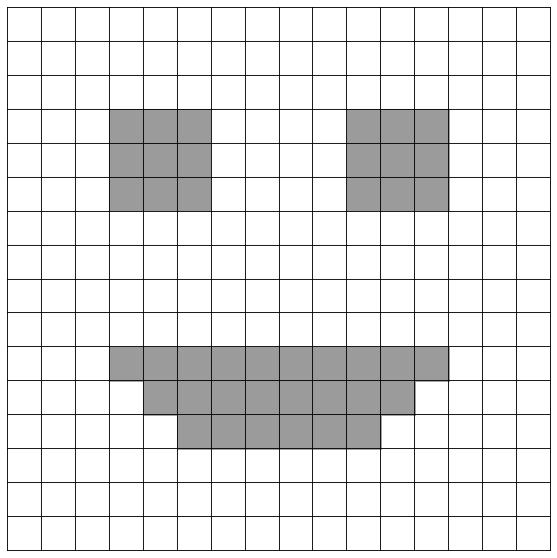

А в качестве структурного элемента будет вот такой крестик:

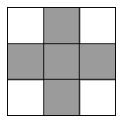

Давайте сразу начнем с примеров, чтобы лучше разобраться. Для более глубокого изучения темы и для определений в терминах теории множеств настоятельно рекомендую посмотреть список дополнительной литературы.

📚 Список литературы по данной теме

- [Цифровая обработка изображений | Гонсалес Рафаэль, Вудс Ричард](https://www.ozon.ru/product/tsifrovaya-obrabotka-izobrazheniy-gonsales-rafael-vuds-richard-242389345/?sh=ZNJzjW5E&utm_source=google&utm_medium=cpc&utm_campaign=RF_Regstore_Product_DSA_NewClients&gclid=Cj0KCQjw8p2MBhCiARIsADDUFVF3HEhYSOdzOa4Wtw7NH1rZiDgX6pZt67qSx2P8WziU2zPP_kvTd9YaAtJAEALw_wcB) глава 9.
- Вот этот [сайт](https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm)
- Документация [OpenCV](https://docs.opencv.org/4.5.3/dd/dd7/tutorial_morph_lines_detection.html)

## Эрозия

Создадим пустую картинку такого же размера, как и исходная:

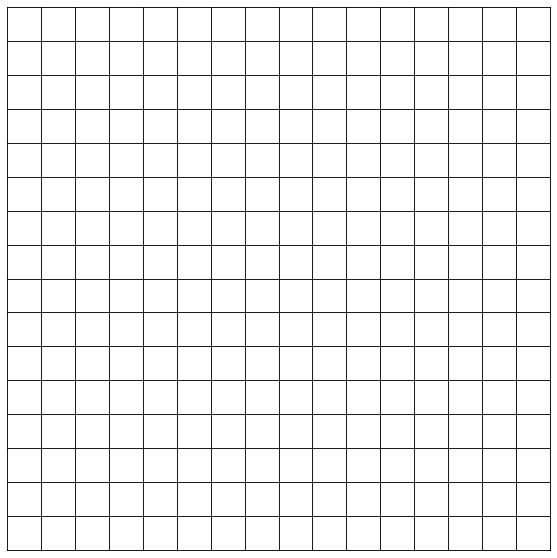

Давайте начнем перемещать центр нашего примитива по исходному изображению таким образом, чтобы он накладывался на каждый пиксель нашего смайлика. 

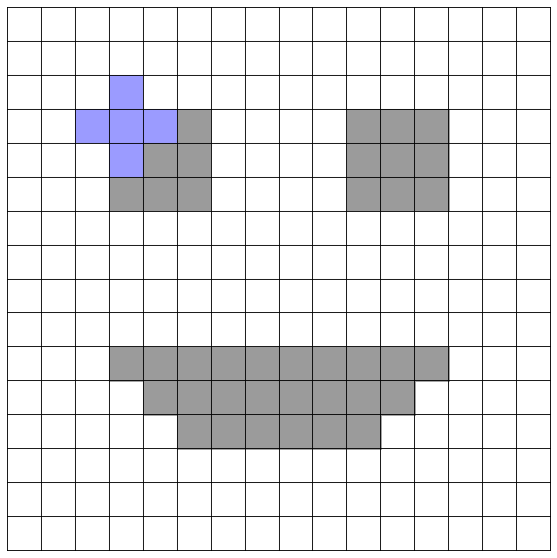

Если при этом весь примитив содержится в исходном множестве, то местоположение этого центра будет закрашено в результирующей картинке. Если нет, то остается пустым (черным) пикселем.

В данном случае у нас два элемента примитива оказались вне смайлика:

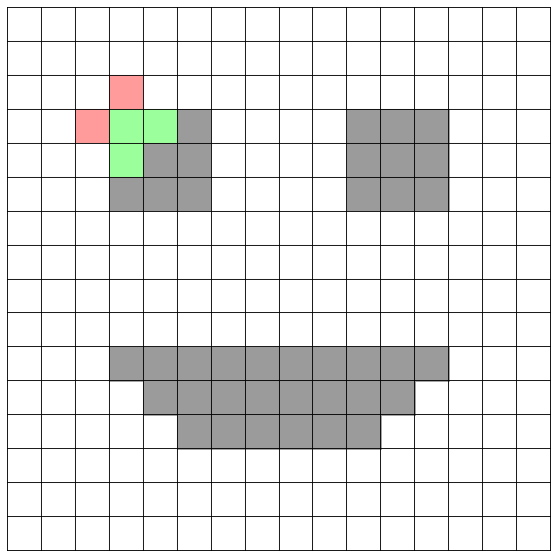

Поэтому мы переходим дальше. Пройдясь по всему левому глазу мы обнаружим, что только в центре будет выполняться указанное выше условие:

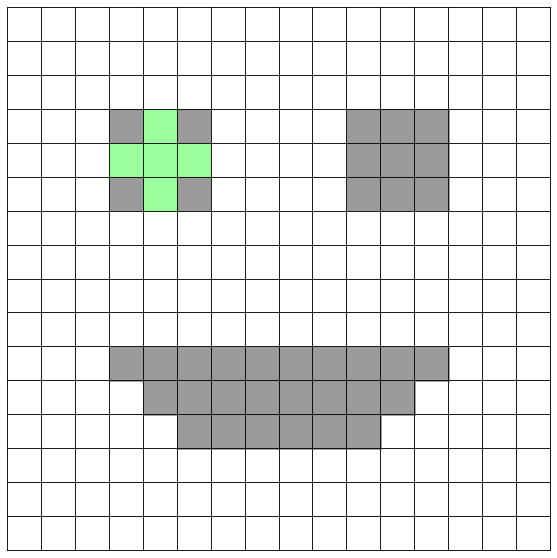

Значит в результирующее множество для левого глаза попадет только центральный пиксель.

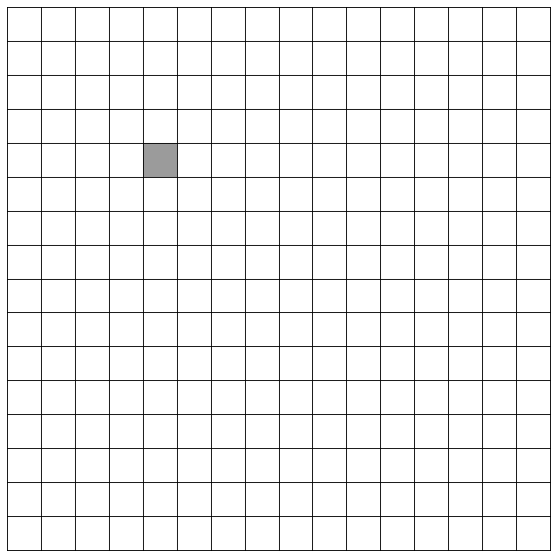

Поступим аналогично с правым глазом и улыбкой:

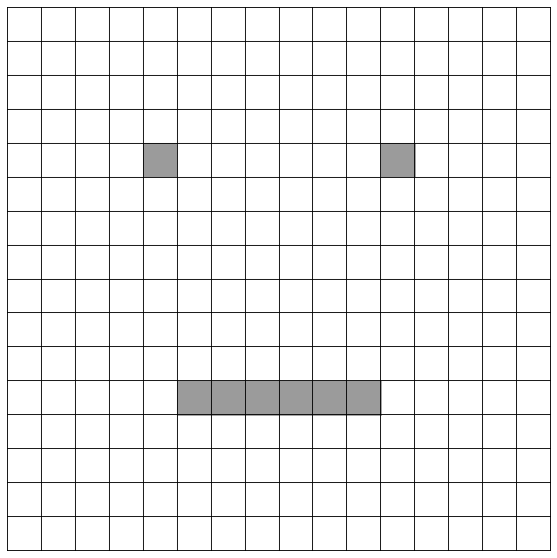

Хммм, кажется, что наш друг чем-то недоволен? Да мы же только что применили к нему эрозию! Кому такое понравится?

Давайте теперь посмотрим, как мы можем провернуть такое же при помощи OpenCV? Для этого в библиотеке присутствует функция [cv2.erode()](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb). Давайте воспользуемся ей:

In [ ]:
# создаем смайлик (придется вручную, но ничего страшного)

def create_smile():
    smile = np.zeros((16, 16), dtype=np.uint8)

    smile[3:6, 3:6] = 255
    smile[3:6, 10:13] = 255
    smile[10:11, 3:13] = 255
    smile[11:12, 4:12] = 255
    smile[12:13, 5:11] = 255
    return smile

smile = create_smile()

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(smile, cmap='gray')


Да, на бинарном изображении он выглядит не так весело, как раньше, но ничего страшного. Нам осталось задать примитив и применить эрозию:

In [ ]:
kernel = np.zeros((3,3), np.uint8)
kernel[1,:] = 1
kernel[:,1] = 1

plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(kernel, cmap='gray')

Вам тоже не нравится данный фрагмент кода, где мы закрашиваем вручную белые части на нашем структурном элементе? К счастью, в OpenCV есть функция [cv2.getStructuringElement()](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc). С ее помощью мы можем получить различные примитивы. Нам на выбор доступны прямоугольники, крестики и эллипсы.

In [ ]:
rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 15))


figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([ellipse, rectangle, cross], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Давайте теперь вернемся к нашему смайлику и применим к нему эрозию:

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
erosion = cv2.erode(smile, kernel, iterations=1)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, erosion], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

## Упражнение 

Поиграемся с различными структурными элементами и смайликом. Попробуйте применить различные структурные элементы (квадрат, круг, линию) и посмотреть, как изменится смайлик. 

In [8]:
smile = create_smile()
kernel = # put yout code here
erosion = cv2.erode(smile, kernel, iterations=1)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, erosion], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

SyntaxError: ignored

## Дилатация

Дилатация противоположна эрозии. Начнем все с того же. Создадим пустое изображение, куда будем помещать результаты работы.

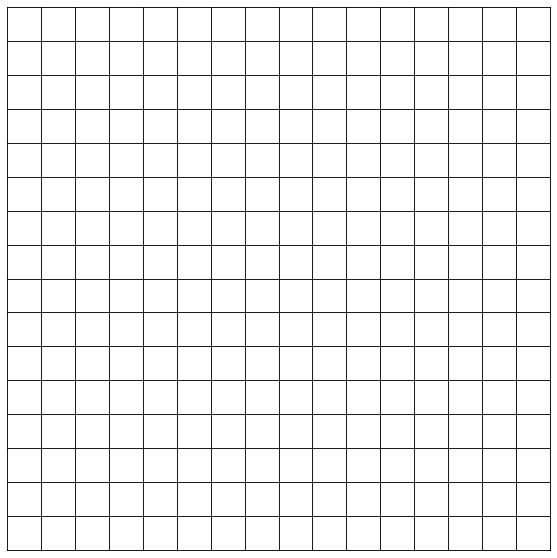

Далее также начнем проходиться центром нашего примитива по пикселям исходной картинки. При этом мы будем закрашивать в результирующем изображении все те пиксели, на которых лежит примитив, если он имеет хотя бы одну точку пересечения с ненулевыми пикселями исходного изображения: 

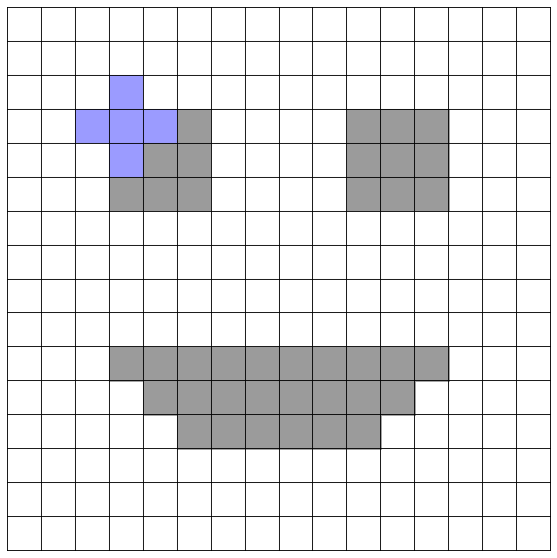

Здесь все отлично, поэтому в результирующее изображение мы добавляем крестик на текущей позиции.

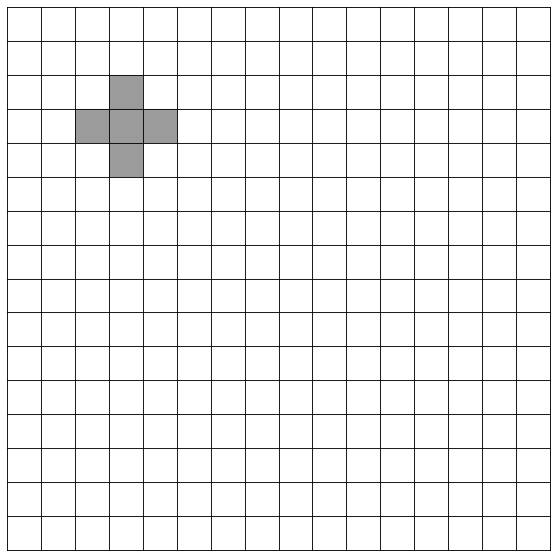

Проходясь таким образом по всему изображению мы достигнем следующего результата:

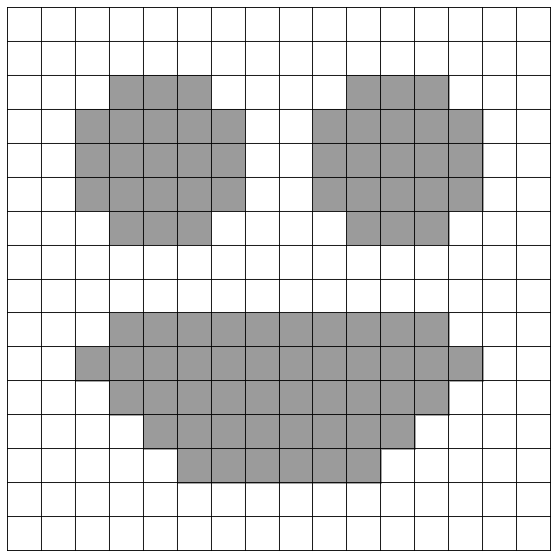

В OpenCV дилатация представлена функцией [cv2.dilate()](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c).

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))
dilation = cv2.dilate(smile, kernel, iterations=1)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, dilation], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

## Упражнение 

Попробуйте догадаться, как нам применить дилатацию, чтобы получить эрозию и наоборот?


In [10]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))
# put yout code here
erosion = # что-то другое, но не эрозия

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, erosion], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

SyntaxError: ignored

## Opening (размыкание)

Выше мы могли заметить, что дилатация приводит к расширению деталей на изображении, а эрозия — к их сужению. 

Давайте теперь попробуем применить сначала эрозию, а затем дилатацию и посмотреть на результат:

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))

erosion = cv2.erode(smile, kernel, iterations=1)
opening = cv2.dilate(erosion, kernel, iterations=1)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Получается, что одна операция это по сути поочередное применение двух других. Неужели нам придется писать каждый раз их поочередно? К счастью, в OpenCV есть функция [cv2.morphologyEx()](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f). Она позволяет указать нам какую морфологическую операцию применить к изображению. Это можно задать при помощи следующих [флагов](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32):
- cv2.MORPH_ERODE
- cv2.MORPH_DILATE
- cv2.MORPH_OPEN
- cv2.MORPH_CLOSE
- cv2.MORPH_GRADIENT
- cv2.MORPH_TOPHAT
- cv2.MORPH_BLACKHAT
- cv2.MORPH_HITMISS


То есть код выше мы можем переписать таким образом:


In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))

opening = cv2.morphologyEx(smile, cv2.MORPH_OPEN, kernel)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

В чем же смысл операции opening? К ней следует относиться таким образом, что она сначала удаляет мелкий шум или размыкает исходное множество, при этом не сильно меняя его. Давайте добавим немного шума на наш смайлик и применим эту операцию:

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))

noise = np.random.normal(0.5, .3, smile.shape)
smile[noise>0.9] = 255

opening = cv2.morphologyEx(smile, cv2.MORPH_OPEN, kernel)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Теперь представим, что глаза у смайлика соединены линией, которая нам особо и не нужна. Применим opening и посмотрим на результат: 

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

smile[4, 4:11] = 255

opening = cv2.morphologyEx(smile, cv2.MORPH_OPEN, kernel)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Давайте еще разок посмотрим на результат работы размыкания, но уже на другой фигуре.

In [ ]:
image = np.zeros((500, 500), dtype=np.uint8)
image = cv2.rectangle(image, (100, 100),(400, 400), 255, -1)

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


plt.figure(figsize=(10, 10))
plt.imshow(opening, cmap='gray')

## Closing (замыкание)

Как вы могли догадаться, замыкание это ни что иное, как применение тех же операций дилатации и эрозии, но уже в другом порядке:

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))

opening = cv2.morphologyEx(smile, cv2.MORPH_CLOSE, kernel)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Если попробовать применить такую операцию к шумному изображению, то ничего хорошего из этого не выйдет:

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3), anchor=(1, 1))

noise = np.random.normal(0.5, .3, smile.shape)
smile[noise>0.9] = 255

opening = cv2.morphologyEx(smile, cv2.MORPH_CLOSE, kernel)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Но если представить, что в изначальном изображении есть некоторые мелкие "дырки", то данная операция поможет их заполнить:

In [ ]:
smile = create_smile()
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

noise = np.random.normal(0.5, .3, smile.shape)
smile[noise>0.8] = 0

opening = cv2.morphologyEx(smile, cv2.MORPH_CLOSE, kernel)

figure, axes = plt.subplots(ncols=3, nrows=1, figsize=(30, 10))

for img, subplot in zip([smile, kernel, opening], axes):
    subplot.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

Вернемся к квадрату.

In [ ]:
image = np.zeros((500, 500), dtype=np.uint8)
image = cv2.rectangle(image, (100, 100),(400, 400), 255, -1)

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(10, 10))
plt.imshow(opening, cmap='gray')

Странно, особо сильно он не изменился. Это не совсем то, чего вы могли ожидать. Давайте немного модифицируем исходный квадрат и добавим разрыв.

In [ ]:
image = np.zeros((500, 500), dtype=np.uint8)
image = cv2.rectangle(image, (100, 100),(400, 400), 255, -1)
image[:,240:260] = 0

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(10, 10))
plt.imshow(opening, cmap='gray')

## Упражнение
Я хочу научить компьютер играть на фортепиано вместо меня. У меня есть вот такой врагмент нот:
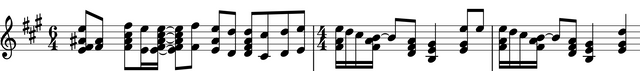


Очевидно, что в данном уроке мы не будем учиться разбираться, где какая нота. Но давайте поможем компьютеру отделить нотный стан от самих нот. Для этого достаточно использовать то, что мы уже изучали с вами на этом уроке.

In [121]:
!mkdir -p input_files & wget "https://i.ibb.co/17MgLBP/image.png" -q -O ./input_files/music.png

(227, 2055, 3)


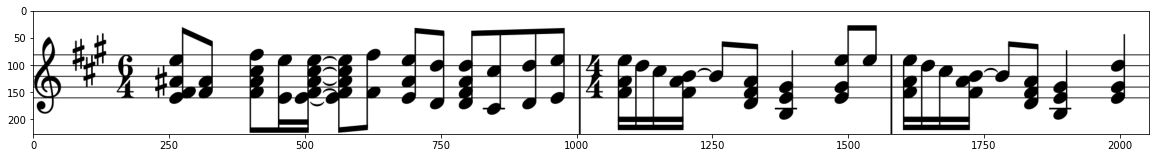

In [126]:
music = cv2.imread('./input_files/music.png')
plt.figure(figsize=(20, 10))
plt.imshow(music)

Здесь напрашивается следующий алгоритм: 
- Перевести изображение в черно-белое
- Инвертировать его
- Применить некую морфологическую операцию для выделения горизонтальных линий
- Применить некую морфологическую операцию для выделения нот

У меня получилось примерно следующее для нот:

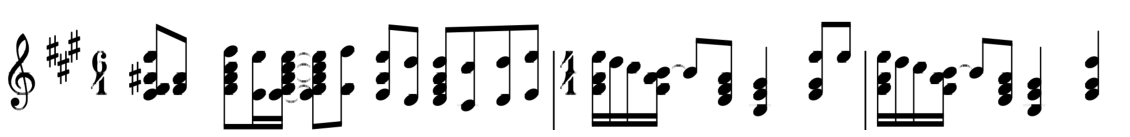

И для нотного стана:
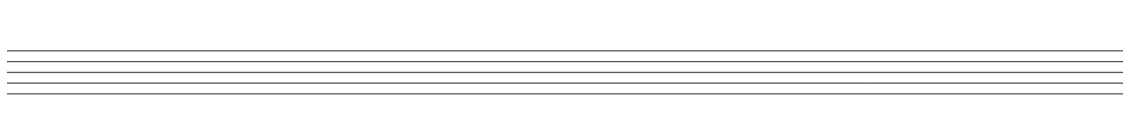

In [ ]:
gray =  # put your code here 
invert_gray = # put your code here 

kernel = # put your code here 
lines = cv2.morphologyEx(invert_gray, ???, kernel)

plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(lines, cmap='gray')

kernel = # put your code here 
notes = cv2.morphologyEx(invert_gray, ???, kernel)

plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(notes, cmap='gray')


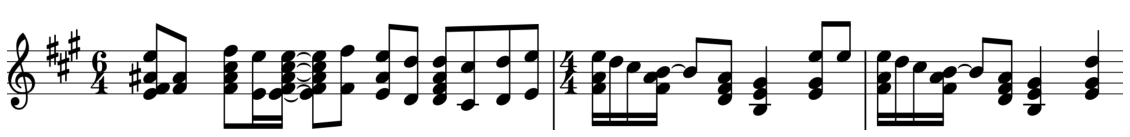

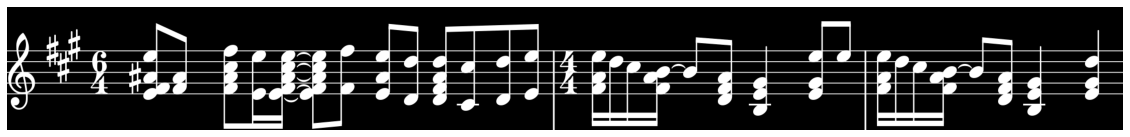

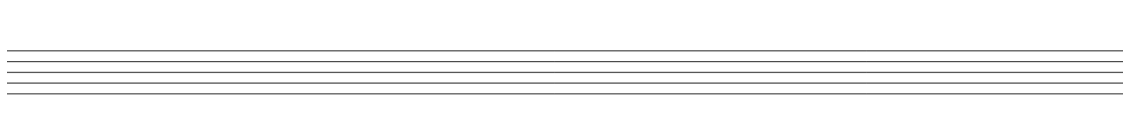

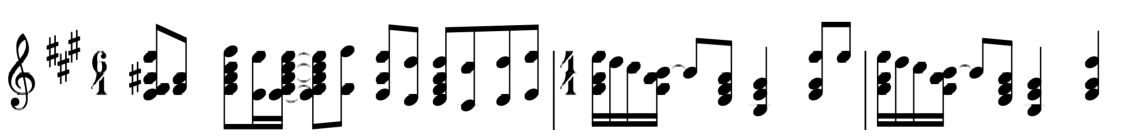

In [176]:
music = cv2.imread('./input_files/music.png')
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(music)

# переводим изображение в одноканальное
gray = cv2.cvtColor(music, cv2.COLOR_BGR2GRAY)

# инвертируем его
gray = cv2.bitwise_not(gray)
# можно инвертировать еще вот так: 
# gray = ~gray

plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(gray, cmap='gray')

# Задаем примитив для выделения линий и применяем Opening
kernel = np.ones((1, 215), dtype=np.uint8)
lines = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(~lines, cmap='gray')

# Задаем примитив для выделения нот и применяем Opening
kernel = np.ones((4, 1), dtype=np.uint8)
notes = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(~notes, cmap='gray')
